# Missing data analysis

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [42]:
DATASET_PATH = '../data/final_sampled_data_2.parquet'

In [43]:
raw_df =  pd.read_parquet(DATASET_PATH)

In [44]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,1.596852e+06,1596852,1596852,1.586300e+06,1.596852e+06,1.586300e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.596852e+06,1.586300e+06,1.596852e+06,1.596852e+06
mean,1.648453e+00,2019-06-28 01:02:05.014844,2019-06-28 01:18:46.395024,1.548425e+00,2.954211e+00,1.060052e+00,1.631810e+02,1.612498e+02,1.266352e+00,1.334935e+01,1.167135e+00,4.942564e-01,2.187600e+00,3.558501e-01,2.986324e-01,1.928576e+01,2.262425e+00,2.823568e+00,2.019299e+03
min,1.000000e+00,2008-12-31 23:05:09,2008-12-31 23:10:26,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.110000e+02,-4.500000e+00,-5.000000e-01,-8.000000e+01,-2.150000e+01,-3.000000e-01,-2.118000e+02,-2.500000e+00,2.000000e+00,2.019000e+03
25%,1.000000e+00,2019-03-04 20:46:10.250000,2019-03-04 20:58:54.750000,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,2.000000e+00,2.019000e+03
50%,2.000000e+00,2019-04-05 01:50:34,2019-04-05 02:10:18,1.000000e+00,1.610000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,3.000000e+00,2.019000e+03
75%,2.000000e+00,2020-02-08 00:59:36,2020-02-08 01:16:21.500000,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00,3.000000e+00,2.020000e+03
max,6.000000e+00,2020-06-24 15:25:13,2020-06-24 15:34:28,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,1.850000e+01,3.300000e+00,4.300000e+02,7.600000e+02,1.000000e+00,6.711032e+05,2.750000e+00,4.000000e+00,2.020000e+03
std,5.019067e-01,NaN,NaN,1.201773e+00,3.840858e+00,7.221345e-01,6.600239e+01,7.024884e+01,4.815525e-01,5.311951e+02,1.273409e+00,6.199301e-02,2.722226e+00,1.712439e+00,2.784853e-02,5.312576e+02,7.453015e-01,7.927046e-01,4.577642e-01


### Null values analisys

In [47]:
## Vemos cuantos valores nulos hay
raw_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            10552
trip_distance                  0
RatecodeID                 10552
store_and_fwd_flag         10552
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       10552
airport_fee              1596852
month                          0
year                           0
dtype: int64

In [48]:
## Calculamos el porcentaje de valores nulos del dataset
null_percentage = ((raw_df.isnull().sum() * 100) / len(raw_df)).round(2)
null_percentage.astype(str) + '%'

VendorID                   0.0%
tpep_pickup_datetime       0.0%
tpep_dropoff_datetime      0.0%
passenger_count           0.66%
trip_distance              0.0%
RatecodeID                0.66%
store_and_fwd_flag        0.66%
PULocationID               0.0%
DOLocationID               0.0%
payment_type               0.0%
fare_amount                0.0%
extra                      0.0%
mta_tax                    0.0%
tip_amount                 0.0%
tolls_amount               0.0%
improvement_surcharge      0.0%
total_amount               0.0%
congestion_surcharge      0.66%
airport_fee              100.0%
month                      0.0%
year                       0.0%
dtype: object

La variable airport_fee tiene la totalidad de sus valores nulos, con lo cual no aporta información a este análisis. Eliminamos esa columna del dataset ya que tampoco tenemos forma de imputar los datos.

Respecto a las siguientes variables:

- passenger_count
- RatecodeID
- store_and_fwd_flag
- congestion_surcharge

vemos que los valores nulos representan menos del 1% de la población de estudio en este análisis. Tambien se observa que coinciden exactamente en la cantidad de valores nulos.

In [49]:
## Eliminamos la columna airport_fee
raw_df = raw_df.drop('airport_fee', axis=1)

Observamos que sucede en las observaciones donde las variables anteriormente mencionadas tienen valores nulos:

In [50]:
raw_df[(raw_df.passenger_count.isna())
    | (raw_df.RatecodeID.isna())
    | (raw_df.store_and_fwd_flag.isna())
    | (raw_df.congestion_surcharge.isna())
].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10552 entries, 78 to 1596847
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10552 non-null  int64         
 1   tpep_pickup_datetime   10552 non-null  datetime64[us]
 2   tpep_dropoff_datetime  10552 non-null  datetime64[us]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          10552 non-null  float64       
 5   RatecodeID             0 non-null      float64       
 6   store_and_fwd_flag     0 non-null      object        
 7   PULocationID           10552 non-null  int64         
 8   DOLocationID           10552 non-null  int64         
 9   payment_type           10552 non-null  int64         
 10  fare_amount            10552 non-null  float64       
 11  extra                  10552 non-null  float64       
 12  mta_tax                10552 non-null  float64       
 13  tip

Vemos que las 4 variables coinciden tener valores nulos en las observaciones en simultaneo.

In [51]:
raw_df[(raw_df.passenger_count.isna())
    | (raw_df.RatecodeID.isna())
    | (raw_df.store_and_fwd_flag.isna())
    | (raw_df.congestion_surcharge.isna())
].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,10552.000000,10552,10552,0.0,10552.000000,0.0,10552.0000,10552.000000,10552.0,10552.000000,10552.000000,10552.000000,10552.000000,10552.000000,1.055200e+04,10552.000000,0.0,10552.000000,10552.000000
mean,2.001801,2019-09-12 06:55:25.726402,2019-09-12 07:26:36.053354,NaN,9.232936,NaN,136.1576,131.274924,0.0,35.734727,2.013040,0.361732,0.237885,1.815245,3.000000e-01,40.613777,NaN,2.919826,2019.498389
min,1.000000,2019-02-01 00:06:00,2019-02-01 00:24:00,NaN,0.000000,NaN,3.0000,1.000000,0.0,-60.850000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,-57.300000,NaN,2.000000,2019.000000
25%,2.000000,2019-03-22 08:36:15,2019-03-22 09:18:45,NaN,4.770000,NaN,74.0000,68.000000,0.0,23.290000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,27.020000,NaN,2.000000,2019.000000
50%,2.000000,2019-04-30 16:42:00,2019-04-30 17:27:30,NaN,8.485000,NaN,137.0000,130.000000,0.0,34.190000,2.750000,0.500000,0.000000,0.000000,3.000000e-01,39.500000,NaN,3.000000,2019.000000
75%,2.000000,2020-03-03 13:46:56.250000,2020-03-03 14:03:05,NaN,13.052500,NaN,205.0000,197.000000,0.0,47.040000,2.750000,0.500000,0.000000,5.760000,3.000000e-01,52.680000,NaN,4.000000,2020.000000
max,6.000000,2020-04-30 23:58:00,2020-05-01 00:15:00,NaN,46.660000,NaN,265.0000,265.000000,0.0,101.410000,11.000000,0.500000,27.160000,36.520000,3.000000e-01,120.500000,NaN,4.000000,2020.000000
std,0.254048,NaN,NaN,NaN,5.721153,NaN,73.5562,74.919926,0.0,16.646883,1.469263,0.223653,1.153094,2.880429,5.551378e-17,18.297921,NaN,0.808809,0.500021


Observamos que payment_type es cero para todas esas filas, siendo que los valores posibles (categorias) son del 1 al 6.

In [52]:
NON_NULL_COLUMNS = ["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"]

In [53]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [54]:
mask = ((raw_df.passenger_count.isna())
         & (raw_df.RatecodeID.isna())
         & (raw_df.store_and_fwd_flag.isna())
         & (raw_df.congestion_surcharge.isna())
         & (raw_df.payment_type == 0))

In [55]:
mask_df = raw_df[~mask]

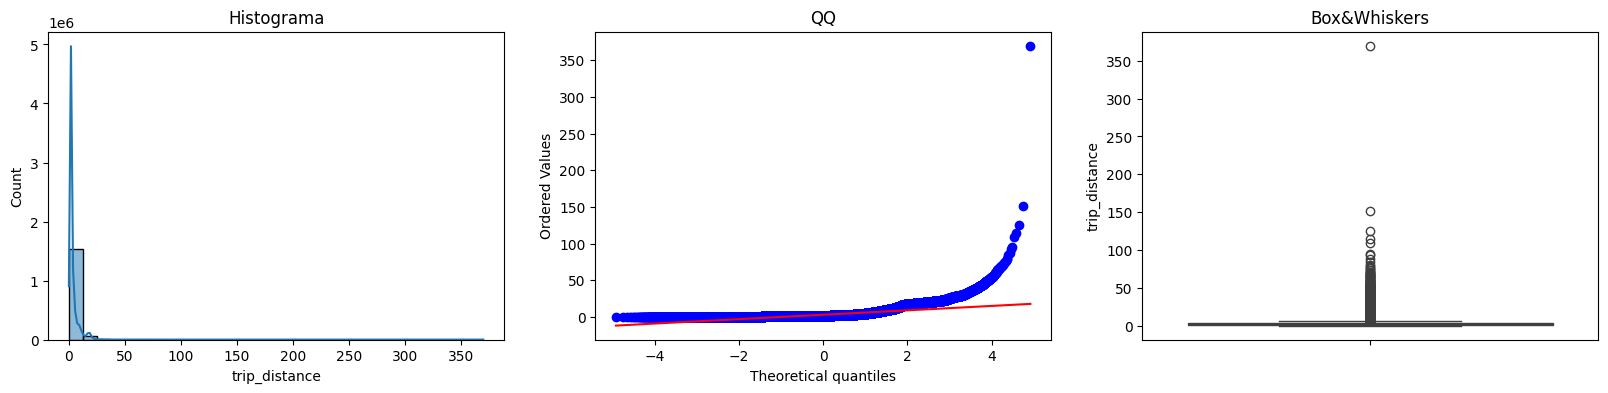

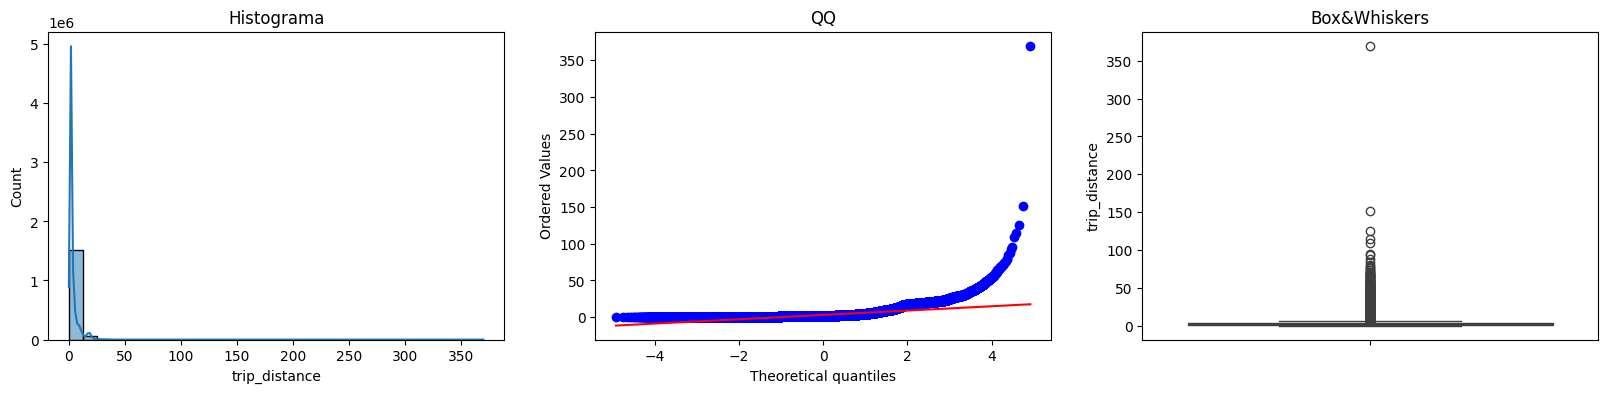

In [15]:
outlier_diagnostic_plots(raw_df, "trip_distance")
outlier_diagnostic_plots(mask_df, "trip_distance")

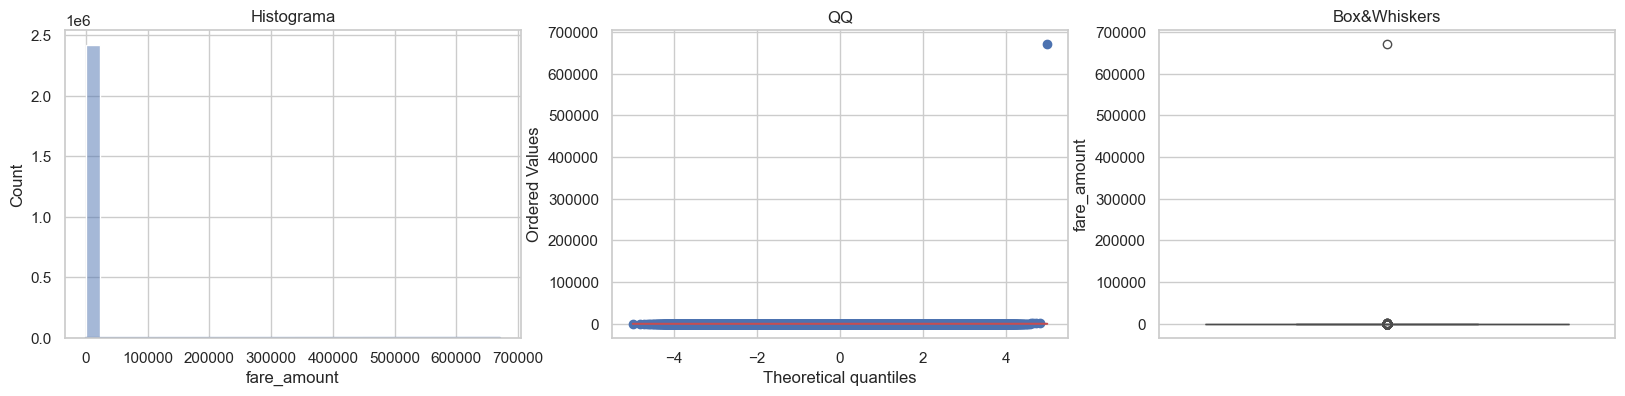

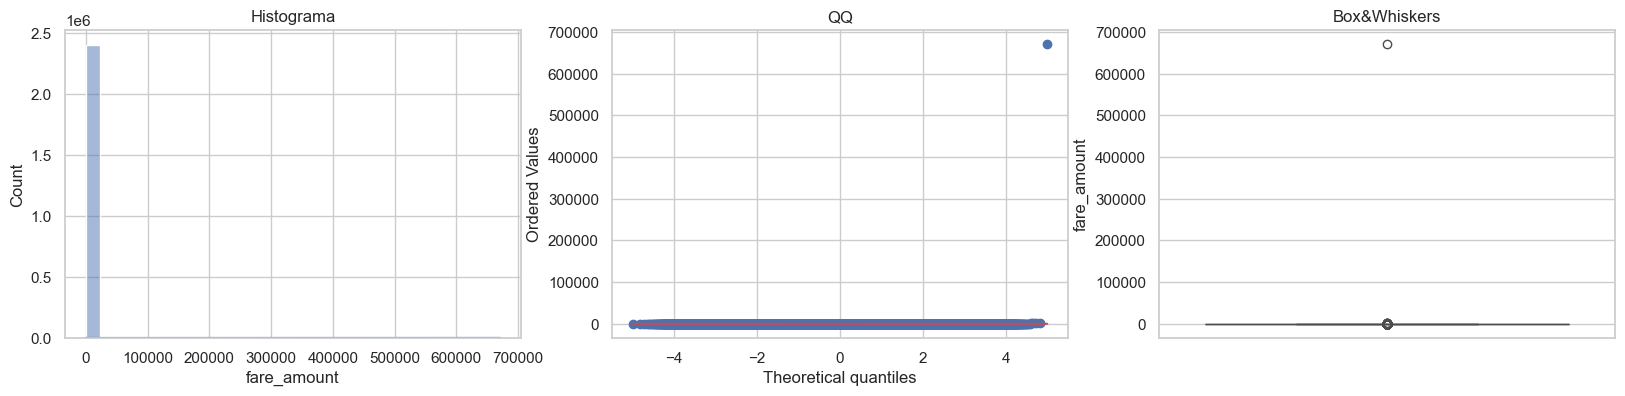

In [ ]:
outlier_diagnostic_plots(raw_df, "fare_amount")
outlier_diagnostic_plots(mask_df, "fare_amount")

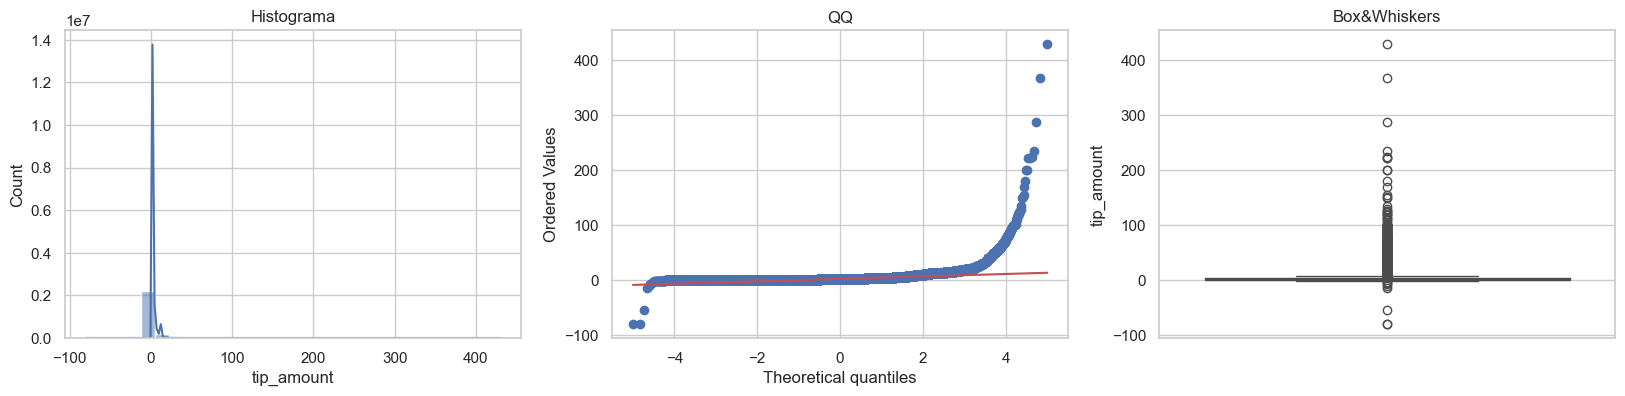

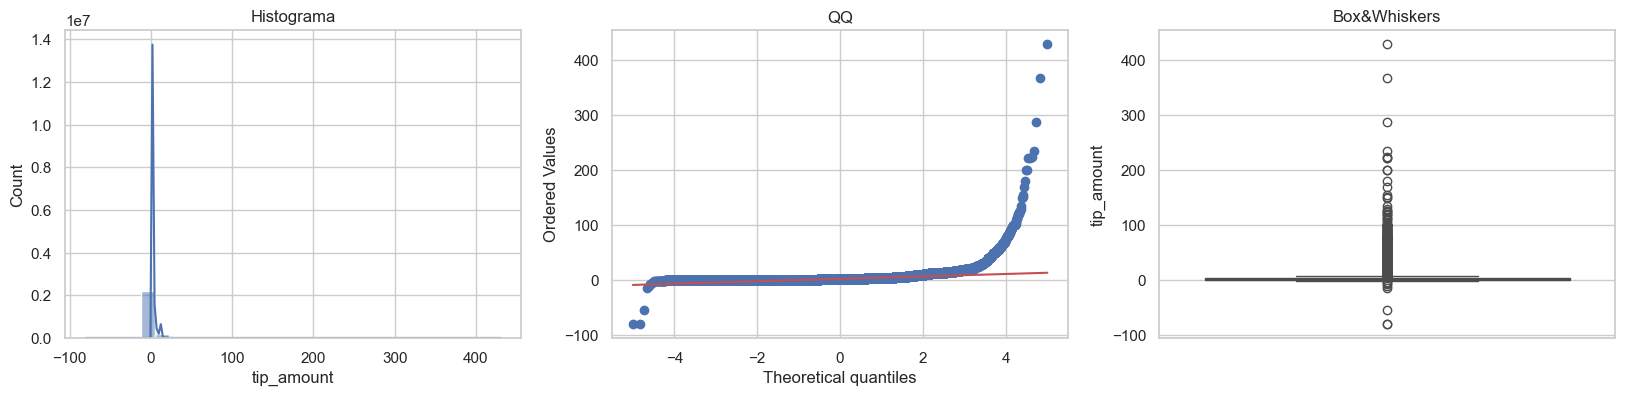

In [211]:

outlier_diagnostic_plots(raw_df, "tip_amount")
outlier_diagnostic_plots(mask_df, "tip_amount")

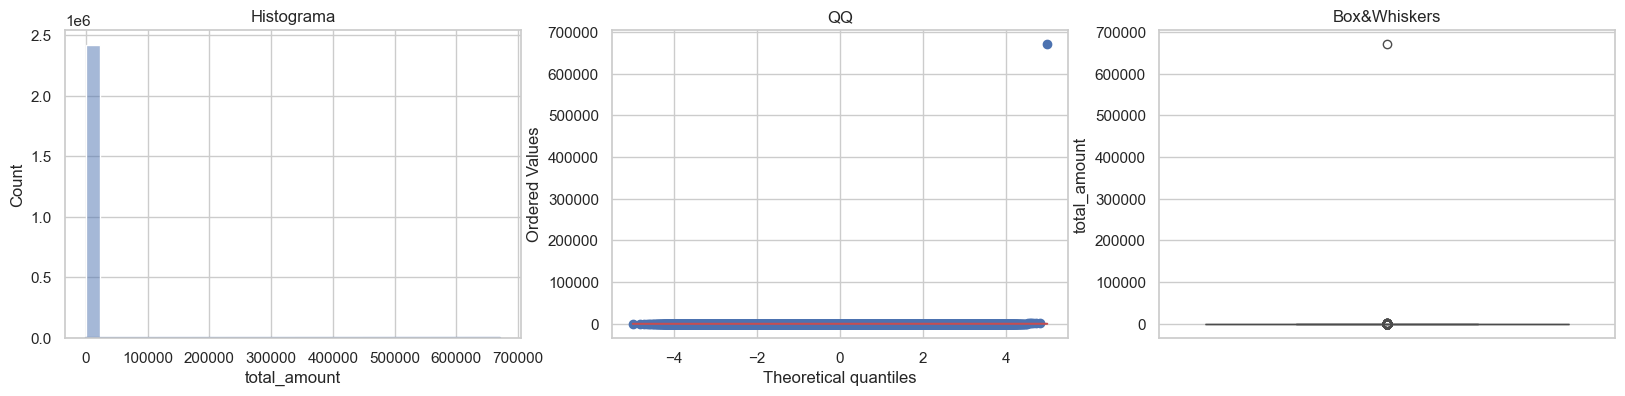

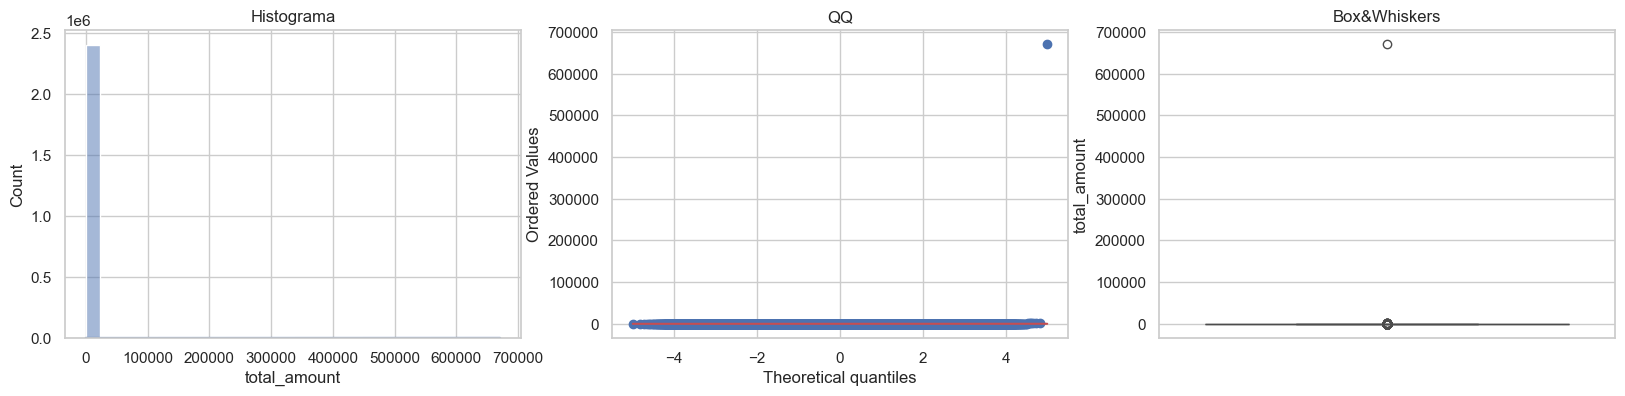

In [212]:
outlier_diagnostic_plots(raw_df, "total_amount")
outlier_diagnostic_plots(mask_df, "total_amount")

Observamos algunas variables numericas continuas de una muestra de 100k elementos del dataframe antes y despues de eliminar las filas con valores nulos. Vemos que las distribuciones no cambian. Esto tambien se apoya sobre el hecho de que la cantidad de observaciones con valores nulos representan menos del 1% del total del dataframe.

Como valores nulos coinciden para las variables: 

- passenger_count
- RatecodeID
- store_and_fwd_flag
- congestion_surcharge

y tambien payment_type es 0 (valor no admitido para la variable categorica). Esto sugiere que tienen una relación (no es un hecho al azar que de que una observacion tenga todos esos valores nulos en simultaneo). Consideramos que tratar de imputar los valores faltantes para todas esas observaciones no seria adecuado al ser observaciones esparzas. Pero como no encontramos información en la web ni en los data dictionary del dataset y la cantidad de observaciones representa menos del 1%, optamos por eliminar dichas observaciones.

In [56]:
#Se dropean filas con valores nulos
raw_df = raw_df[~mask]

In [57]:
## Calculamos el porcentaje de valores cero de passenger_count para el dataset
null_percentage = (((raw_df.passenger_count == 0).sum() * 100) / len(raw_df)).round(2)
null_percentage.astype(str) + '%'

'1.85%'

In [58]:
raw_df[raw_df.passenger_count == 0].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,29279.000000,29279,29279,29279.0,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000,29279.000000
mean,1.004508,2019-07-08 16:02:28.772669,2019-07-08 16:16:03.624816,0.0,2.780824,1.149459,163.999488,162.069914,1.300386,12.595793,2.576538,0.495270,2.123878,0.327888,0.299662,18.423213,2.240343,2.829297,2019.327231
min,1.000000,2019-02-01 00:10:16,2019-02-01 00:26:40,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,-111.000000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-111.800000,-2.500000,2.000000,2019.000000
25%,1.000000,2019-03-07 07:06:47.500000,2019-03-07 07:17:15,0.0,0.900000,1.000000,114.000000,107.000000,1.000000,6.000000,2.500000,0.500000,0.000000,0.000000,0.300000,11.000000,2.500000,2.000000,2019.000000
50%,1.000000,2019-04-08 09:51:39,2019-04-08 10:14:42,0.0,1.500000,1.000000,162.000000,162.000000,1.000000,9.000000,2.500000,0.500000,1.850000,0.000000,0.300000,14.150000,2.500000,3.000000,2019.000000
75%,1.000000,2020-02-12 06:49:47.500000,2020-02-12 06:58:58.500000,0.0,2.800000,1.000000,233.000000,234.000000,2.000000,14.000000,3.000000,0.500000,2.850000,0.000000,0.300000,19.800000,2.500000,3.000000,2020.000000
max,2.000000,2020-04-30 20:49:02,2020-04-30 21:01:00,0.0,79.400000,99.000000,265.000000,265.000000,4.000000,285.000000,7.000000,0.500000,100.000000,70.000000,0.300000,285.300000,2.500000,4.000000,2020.000000
std,0.066994,NaN,NaN,0.0,3.756038,2.837072,65.911089,70.259290,0.528222,11.556289,0.909252,0.049104,2.596242,1.682965,0.011756,14.008237,0.762999,0.791262,0.469210


In [59]:
negative_values_mask = ((raw_df.fare_amount <= 0)
    & (raw_df.extra <= 0)
    & (raw_df.mta_tax <= 0)
    & (raw_df.tolls_amount <= 0)
    & (raw_df.improvement_surcharge <= 0)
    & (raw_df.total_amount <= 0)
    & (raw_df.congestion_surcharge <= 0))

In [60]:
raw_df[negative_values_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,3592.000000,3592,3592,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000
mean,1.981626,2019-09-03 20:41:24.290646,2019-09-03 20:50:35.716313,1.492483,1.451075,1.261136,158.655067,160.026169,3.137249,-9.996651,-0.328369,-0.443903,-0.015267,-0.140303,-0.271687,-12.885894,-1.589644,2.747216,2019.491091
min,1.000000,2019-02-01 00:09:57,2019-02-01 00:09:57,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-211.000000,-4.500000,-0.500000,-80.000000,-21.500000,-0.300000,-211.800000,-2.500000,2.000000,2019.000000
25%,2.000000,2019-03-17 18:18:28,2019-03-17 18:21:39,1.000000,0.030000,1.000000,113.000000,107.000000,3.000000,-8.500000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-11.800000,-2.500000,2.000000,2019.000000
50%,2.000000,2019-04-29 15:40:02,2019-04-29 15:40:31,1.000000,0.440000,1.000000,161.000000,161.000000,3.000000,-4.500000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-7.800000,-2.500000,3.000000,2019.000000
75%,2.000000,2020-02-24 05:40:47.750000,2020-02-24 06:04:21.500000,2.000000,0.960000,1.000000,230.000000,231.250000,4.000000,-2.500000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-5.800000,0.000000,3.000000,2020.000000
max,2.000000,2020-04-30 22:37:05,2020-04-30 22:45:05,8.000000,28.850000,99.000000,265.000000,265.000000,4.000000,0.000000,0.000000,0.000000,12.280000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000
std,0.134319,NaN,NaN,1.092466,3.083956,2.428312,68.348550,71.460239,0.829580,15.674356,0.587970,0.157824,1.421690,1.069914,0.087718,16.307050,1.203140,0.768800,0.499990


In [61]:
raw_df[negative_values_mask].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
2922,2,2019-02-02 18:20:39,2019-02-02 18:20:47,1.0,0.00,1.0,N,193,193,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.0,2,2019
3359,2,2019-02-27 19:41:11,2019-02-27 19:43:48,2.0,0.26,5.0,N,265,265,3,-74.8,0.0,0.0,0.0,0.0,-0.3,-75.1,0.0,2,2019
5041,2,2019-02-08 10:46:07,2019-02-08 11:01:32,1.0,0.95,1.0,N,234,90,3,-10.0,0.0,-0.5,0.0,0.0,-0.3,-13.3,-2.5,2,2019
6582,2,2019-02-02 14:19:52,2019-02-02 14:33:32,2.0,3.51,1.0,N,239,246,4,-14.0,0.0,-0.5,0.0,0.0,-0.3,-17.3,0.0,2,2019
7781,2,2019-02-02 19:55:04,2019-02-02 20:02:15,2.0,1.04,1.0,N,129,129,4,-6.0,0.0,-0.5,0.0,0.0,-0.3,-6.8,0.0,2,2019


Eliminamos dichas filas:

In [62]:
raw_df = raw_df[~negative_values_mask]

Transformamos los valores pickup y dropoff en datetime:

In [63]:
raw_df['tpep_pickup_datetime'] = pd.to_datetime(raw_df['tpep_pickup_datetime'])
raw_df['tpep_dropoff_datetime'] = pd.to_datetime(raw_df['tpep_dropoff_datetime'])

In [64]:
#Agregamos un nuevo feature llamado "trip duration" en minutos
raw_df['trip_duration'] = (raw_df['tpep_dropoff_datetime'] - raw_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [65]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,1.582708e+06,1582708,1582708,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06,1.582708e+06
mean,1.645341e+00,2019-06-27 09:08:26.690536,2019-06-27 09:25:03.298586,1.548552e+00,2.915761e+00,1.059596e+00,1.633715e+02,1.614524e+02,1.270548e+00,1.325309e+01,1.164890e+00,4.972691e-01,2.205598e+00,3.472463e-01,2.999176e-01,1.921658e+01,2.271167e+00,2.823100e+00,2.019297e+03,1.661013e+01
min,1.000000e+00,2008-12-31 23:05:09,2008-12-31 23:10:26,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.500000e+00,0.000000e+00,0.000000e+00,-6.120000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.019000e+03,-5.254605e+05
25%,1.000000e+00,2019-03-04 18:55:53.750000,2019-03-04 19:09:11.500000,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,2.000000e+00,2.019000e+03,6.516667e+00
50%,2.000000e+00,2019-04-04 21:55:15.500000,2019-04-04 22:11:17,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.455000e+01,2.500000e+00,3.000000e+00,2.019000e+03,1.088333e+01
75%,2.000000e+00,2020-02-07 20:51:32.750000,2020-02-07 21:05:47,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.016000e+01,2.500000e+00,3.000000e+00,2.020000e+03,1.773333e+01
max,4.000000e+00,2020-06-24 15:25:13,2020-06-24 15:34:28,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,1.850000e+01,3.300000e+00,4.300000e+02,7.600000e+02,1.000000e+00,6.711032e+05,2.750000e+00,4.000000e+00,2.020000e+03,2.598798e+04
std,5.025896e-01,NaN,NaN,1.202008e+00,3.791412e+00,7.135760e-01,6.590619e+01,7.017094e+01,4.623316e-01,5.335568e+02,1.269266e+00,3.693001e-02,2.725181e+00,1.698798e+00,5.015241e-03,5.336184e+02,7.209008e-01,7.926026e-01,4.569840e-01,4.234492e+02


Consultamos el dataframe para ver si tenemos observaciones con pickup time menor a febrero de 2019 o mayor a marzo 2020. Luego las eliminamos del dataframe.

In [66]:
datetime_mask = ((~raw_df['tpep_pickup_datetime'].dt.year.isin([2019, 2020])) 
    | (~raw_df['tpep_pickup_datetime'].dt.month.isin([2, 3, 4])))

raw_df[datetime_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,59.0,59,59,59.000000,59.000000,59.0,59.000000,59.000000,59.00000,59.000000,59.000000,59.0,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.0,2016-07-05 13:06:13.169491,2016-07-05 14:41:57.355932,2.135593,3.599153,1.0,169.813559,162.627119,1.40678,14.076271,0.440678,0.5,1.563559,0.097627,3.000000e-01,18.673051,1.694915,2.525424,2019.322034,95.736441
min,2.0,2008-12-31 23:05:09,2008-12-31 23:10:26,1.000000,0.000000,1.0,43.000000,40.000000,1.00000,2.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,3.300000,0.000000,2.000000,2019.000000,0.050000
25%,2.0,2009-01-01 11:46:00.500000,2009-01-01 19:06:23,1.000000,1.030000,1.0,132.000000,132.500000,1.00000,6.000000,0.500000,0.5,0.000000,0.000000,3.000000e-01,10.750000,0.000000,2.000000,2019.000000,6.500000
50%,2.0,2019-01-31 23:59:28,2019-02-01 00:41:34,1.000000,1.710000,1.0,162.000000,161.000000,1.00000,9.500000,0.500000,0.5,1.260000,0.000000,3.000000e-01,13.300000,2.500000,2.000000,2019.000000,13.183333
75%,2.0,2019-11-09 05:11:19,2019-11-09 05:24:59.500000,3.000000,4.950000,1.0,232.500000,230.500000,2.00000,17.000000,0.500000,0.5,2.290000,0.000000,3.000000e-01,23.130000,2.500000,3.000000,2020.000000,22.550000
max,2.0,2020-06-24 15:25:13,2020-06-24 15:34:28,6.000000,19.080000,1.0,263.000000,263.000000,2.00000,52.500000,1.000000,0.5,11.640000,5.760000,3.000000e-01,56.800000,2.500000,4.000000,2020.000000,1398.600000
std,0.0,NaN,NaN,1.766134,4.030222,0.0,65.486107,63.198073,0.49545,11.483802,0.279851,0.0,2.147031,0.749888,5.598765e-17,12.301318,1.178167,0.816974,0.471267,287.185001


Vemos que tenemos 110 filas donde ya sea el año o el mes no corresponden con el deseado, al ser pocos valores directamente optamos por asumir que son errores y filtrarlos.

In [67]:
raw_df = raw_df[~datetime_mask]

Buscamos si hay valores para "trip_duration" que sean cero o negativas

In [68]:
null_duration_mask = ((raw_df['trip_duration']== 0))

In [69]:
neg_duration_mask = ((raw_df['trip_duration']< 0))

In [70]:
raw_df[null_duration_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,1115.000000,1115,1115,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.0
mean,1.130942,2019-06-07 10:42:46.841255,2019-06-07 10:42:46.841255,1.258296,0.197229,3.522870,176.758744,259.179372,1.934529,16.254197,1.934978,0.437220,0.353910,0.504897,0.266099,19.760269,1.544843,2.808969,2019.243946,0.0
min,1.000000,2019-02-01 04:58:01,2019-02-01 04:58:01,0.000000,0.000000,1.000000,2.000000,13.000000,1.000000,0.000000,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2019.000000,0.0
25%,1.000000,2019-02-23 10:44:52,2019-02-23 10:44:52,1.000000,0.000000,1.000000,132.000000,264.000000,2.000000,2.500000,0.000000,0.500000,0.000000,0.000000,0.300000,5.800000,0.000000,2.000000,2019.000000,0.0
50%,1.000000,2019-03-31 17:36:07,2019-03-31 17:36:07,1.000000,0.000000,1.000000,164.000000,264.000000,2.000000,7.000000,2.500000,0.500000,0.000000,0.000000,0.300000,10.300000,2.500000,3.000000,2019.000000,0.0
75%,1.000000,2019-04-30 08:23:56,2019-04-30 08:23:56,1.000000,0.000000,1.000000,239.000000,264.000000,2.000000,16.500000,3.000000,0.500000,0.000000,0.000000,0.300000,19.800000,2.500000,4.000000,2019.000000,0.0
max,2.000000,2020-04-24 17:31:21,2020-04-24 17:31:21,6.000000,18.900000,99.000000,265.000000,265.000000,3.000000,172.300000,7.000000,0.500000,20.200000,90.500000,0.300000,172.300000,2.500000,4.000000,2020.000000,0.0
std,0.337488,NaN,NaN,0.866083,1.532529,14.499928,70.882081,26.509477,0.284584,21.914431,1.434862,0.165751,1.968551,3.521565,0.095022,22.842298,1.215275,0.823962,0.429653,0.0


In [71]:
raw_df[neg_duration_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.000000
mean,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
min,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
25%,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
50%,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
75%,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
max,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.3,2.0,132.0,88.0,2.0,52.0,2.5,0.5,0.0,5.76,0.3,61.06,2.5,2.0,2019.0,-525460.483333
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dado que tenemos un pequeño valor de viajes donde la duracion es negativa o cero, dropeamos estas filas. 

In [72]:
raw_df = raw_df[(~neg_duration_mask) & (~null_duration_mask)]

Vemos la cantidad de valores cero para la variable passenger_count:

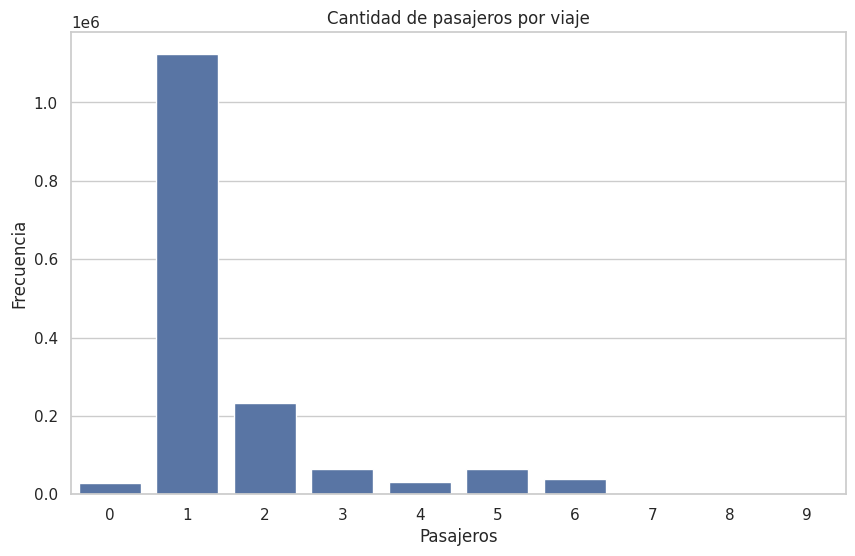

In [73]:
conteo_valores = raw_df.passenger_count.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index.astype(int), y=conteo_valores.values)

plt.title('Cantidad de pasajeros por viaje')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencia')

plt.show()

In [74]:
cero_passenger_mask = (raw_df.passenger_count == 0)
cero_percentage = ((cero_passenger_mask.sum() * 100) / len(raw_df)).__round__(2)
cero_percentage.astype(str) + '%'

'1.85%'

In [75]:
raw_df[cero_passenger_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,29206.000000,29206,29206,29206.0,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000,2.920600e+04,29206.000000,29206.000000,29206.000000,29206.000000,29206.000000
mean,1.004314,2019-07-08 18:38:31.293912,2019-07-08 18:52:08.097548,0.0,2.787721,1.068000,163.928439,161.851674,1.299117,12.582831,2.579999,0.495806,2.128570,0.327526,3.000000e-01,18.419012,2.243631,2.829145,2019.327535,13.613394
min,1.000000,2019-02-01 00:10:16,2019-02-01 00:26:40,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,0.300000,0.000000,2.000000,2019.000000,0.016667
25%,1.000000,2019-03-07 07:45:33.250000,2019-03-07 08:01:13.250000,0.0,0.900000,1.000000,114.000000,107.000000,1.000000,6.000000,2.500000,0.500000,0.000000,0.000000,3.000000e-01,11.000000,2.500000,2.000000,2019.000000,6.183333
50%,1.000000,2019-04-08 10:01:38,2019-04-08 10:30:29,0.0,1.500000,1.000000,162.000000,162.000000,1.000000,9.000000,2.500000,0.500000,1.850000,0.000000,3.000000e-01,14.150000,2.500000,3.000000,2019.000000,10.583333
75%,1.000000,2020-02-12 07:38:06.750000,2020-02-12 07:51:34.750000,0.0,2.800000,1.000000,233.000000,234.000000,2.000000,14.000000,3.000000,0.500000,2.850000,0.000000,3.000000e-01,19.800000,2.500000,3.000000,2020.000000,17.216667
max,2.000000,2020-04-30 20:49:02,2020-04-30 21:01:00,0.0,79.400000,6.000000,265.000000,265.000000,4.000000,285.000000,7.000000,0.500000,100.000000,70.000000,3.000000e-01,285.300000,2.500000,4.000000,2020.000000,1439.316667
std,0.065542,NaN,NaN,0.0,3.758185,0.435261,65.890589,70.177558,0.527125,11.437454,0.904990,0.045603,2.597114,1.678691,5.551210e-17,13.911792,0.758430,0.791052,0.469322,18.146247


Como la cantidad de observaciones con valores cero para la columna passenger_count representa menos del 5% total de observaciones, eliminamos las mismas del dataframe.

In [76]:
raw_df = raw_df[~cero_passenger_mask]

In [77]:
raw_df.shape

(1552327, 21)

In [78]:
org_df =  pd.read_parquet(DATASET_PATH)

In [79]:
org_df.shape

(1596852, 21)

In [80]:
#Porcentaje filtrado

print(f"Porcentaje de valores eliminados {((org_df.shape[0] - raw_df.shape[0])/org_df.shape[0])*100}")

Porcentaje de valores eliminados 2.7882984772539974


In [81]:
null_filtered_df = raw_df

Finalmente, vemos que del dataset original hemos filtrado el 2.76% de los valores del dataset, debido a nulidad de sus valores

### Filtrado de columnas. 

Las siguientes columnas no nos brindan mucha informacion respecto a las preguntas que deseamos responder, por ello directamente haremos un drop de dichas columnas, las cuales son: 

* VendorID
* RatecodeID, 
* store_and_fwd_flag
* congestion_surcharge 
* airport_fee (already dropped)



In [82]:
columns_to_drop = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge']
column_filtered_df = null_filtered_df.drop(columns=columns_to_drop)

También, nos quedaremos solo con los datos que hayan sido pagados con Credit Card (Payment_type = 1) porque dichos datos se cargan automaticamente al finalizar un viaje mientras que los otros métodos se cargan manualmente. Esto nos asegura tener datos más certeros. 

In [83]:
pyment_type_filtered_df =column_filtered_df[column_filtered_df['payment_type']==1]

pyment_type_filtered_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596845,2020-04-25 15:46:48,2020-04-25 15:54:26,1.0,1.75,43,233,1,8.0,0.0,0.5,0.00,0.0,0.3,11.30,4,2020,7.633333
1596846,2020-04-16 11:12:46,2020-04-16 11:25:21,1.0,2.10,140,163,1,11.0,2.5,0.5,2.85,0.0,0.3,17.15,4,2020,12.583333
1596848,2020-04-30 01:48:23,2020-04-30 01:56:34,1.0,2.40,239,230,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,4,2020,8.183333
1596849,2020-04-11 12:05:59,2020-04-11 12:14:03,1.0,1.94,262,43,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,4,2020,8.066667


Como resumen, llegamos a un dataset con: 

* Datos correspondientes a los meses de Febrero y Marzo de los años 2019 y 2020 (Sampleo del 10% de cada mes)
* Se agregó una columna de trip_duration 
* Se filtraron los valores nulos/erroneos encontrados (3.35%)
* Se eliminaron las columnas: ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee'] por no aportar informacion relevante al analisis planteado
* Nos quedamos solo con los datos correspondientes a pagos con tarjeta de credito por tratarse de datos mas fiables. 

Finalmente llegamos a un dataset filtrado de aproximadamente 1.35 Millones de filas. 

In [84]:
pyment_type_filtered_df.to_parquet('../data/null_filtered_sampled_data_2020_2019_02_03_04.parquet')

In [85]:
final_df = pd.read_parquet('../data/null_filtered_sampled_data_2020_2019_02_03_04.parquet')

In [87]:
final_df[final_df['year']==2020].shape

(345143, 17)